<a href="https://colab.research.google.com/github/TranThaiAn19146304/BT_CNN2/blob/main/cnn_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BƯỚC 1: THÊM THƯ VIỆN**

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

**BƯỚC 2: LẤY DỮ LIỆU**


In [3]:
#lấy dữ liệu
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

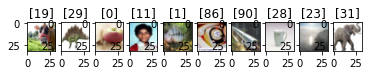

In [5]:
#xem du lieu
import matplotlib.pyplot as plt

for i in range(10):
  plt.subplot(1,10,1+i)
  plt.title(str(y_train[i]))
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
# Định dạng x_train
x_train = x_train.astype('float32')
x_train /= 255

# Định dạng y_train
y_train = np_utils.to_categorical(y_train, 100)

**BƯỚC 3: TẠO MODEL**

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

**BƯỚC 4: TRAINING**

In [8]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
625/625 [==============================] - 9s 10ms/step - loss: 4.0185 - acc: 0.0878 - val_loss: 3.5250 - val_acc: 0.1632
Epoch 2/15
625/625 [==============================] - 5s 8ms/step - loss: 3.1880 - acc: 0.2270 - val_loss: 3.0133 - val_acc: 0.2639
Epoch 3/15
625/625 [==============================] - 5s 8ms/step - loss: 2.7253 - acc: 0.3136 - val_loss: 2.8162 - val_acc: 0.3128
Epoch 4/15
625/625 [==============================] - 5s 8ms/step - loss: 2.3713 - acc: 0.3893 - val_loss: 2.6329 - val_acc: 0.3466
Epoch 5/15
625/625 [==============================] - 5s 8ms/step - loss: 2.0524 - acc: 0.4550 - val_loss: 2.6040 - val_acc: 0.3551
Epoch 6/15
625/625 [==============================] - 5s 8ms/step - loss: 1.7587 - acc: 0.5200 - val_loss: 2.6166 - val_acc: 0.3645
Epoch 7/15
625/625 [==============================] - 5s 8ms/step - loss: 1.4856 - acc: 0.5843 - val_loss: 2.6952 - val_acc: 0.3723
Epoch 8/15
625/625 [==============================] - 5s 8ms/step - loss: 1

**BƯỚC 5: VẼ ĐỒ THỊ CHẤT LƯỢNG**

In [9]:
#thêm hàm con để vẽ đồ thị
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

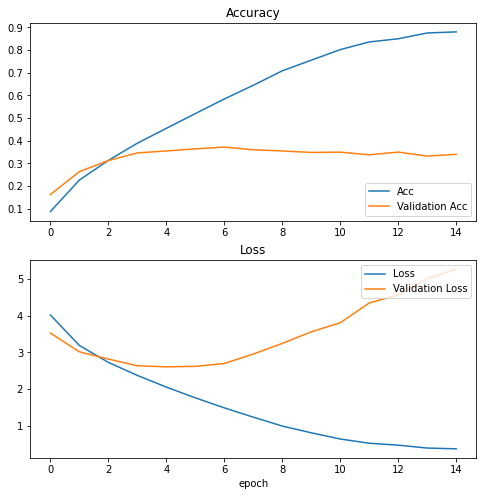

In [10]:
plot_history(his)

**BƯỚC 6: NHẬN DẠNG**

In [27]:
#gắn thẻ cho ảnh
f = open("label_cifar100.txt")
label = []
for i in range(100):
    label.append(f.readline().split(':')[1].split(" ")[1])
f.close()

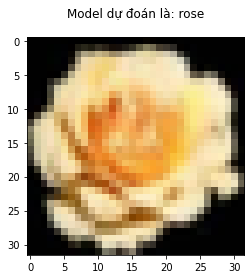

In [29]:
#nhận dạng ảnh
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

x_pre = x_test[20]
plt.title("Model dự đoán là: " + str(label[
                                 np.argmax(model.predict(x_pre.reshape((1,32,32,3))))]))
plt.imshow(x_pre, cmap=plt.get_cmap('gray'))


**BƯỚC 7: LƯU MODEL**

In [26]:
model.save("cifar100.h5")